In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

## What factors/variables affect the price of avocados?
1. Region 
2. Season
3. Organic v. Non Organic


### Data Cleaning
**DATA CLEANING**: Get each of your datasets into a usable (likely, tidy) format. Briefly explain what steps you had to take before you were able to use the datasets you chose to answer your question of interest.

- How 'clean' is the data?
- What did you have to do to get the data into a usable format? (If you did nothing, how did you determine there was nothing to do?)
- What pre-processing steps that were required for your methods (for example, checking data distributions and performing any transformations that may be required)

In [38]:
avocado = pd.read_csv("avocado.csv")
avocado = avocado.drop(columns=['Unnamed: 0'])
original_avocado = avocado
original_avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [39]:
# Let's look at the dimension of the data
print(f'Data contain {avocado.shape[0]} records and {avocado.shape[1]} columns.')

Data contain 18249 records and 13 columns.


In [40]:
# Let's deduce data types
avocado.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [41]:
# Change types

# Date to datetime
avocado.Date = pd.to_datetime(avocado.Date)

# type to category 
avocado.type = avocado.type.astype('category')

In [42]:
avocado.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                  category
year                     int64
region                  object
dtype: object

In [43]:
# Missing Values 
avocado.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [44]:
# Check regions 
avocado.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [45]:
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

### Exploratory Data Analysis:

In this phase of the project we will concentrate mainly on two aspects of the time series forecasting analysis hich consists of:
- **Organic vs Nonorganic**: In this section, we will focus on the pricing on organic vs nonorganic.
- **Seasonal Patterns**: In this section, we will focus on constant patterns that occur frequently from year to year and from month to month in both types of avocados conventional and organic.
- **Region Patters**: In this section, we will focus on constant pattern that occur in different regions in both types of avocados conventional and organic.

#### Organic vs Nonorganic avocados

In [46]:
# Check types
avocado.type.unique()

['conventional', 'organic']
Categories (2, object): ['conventional', 'organic']

In [47]:
# how many are in each group?
avocado.groupby('type').count()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
type,,,,,,,,,,,,
conventional,9126,9126,9126,9126,9126,9126,9126,9126,9126,9126,9126,9126
organic,9123,9123,9123,9123,9123,9123,9123,9123,9123,9123,9123,9123


In [48]:
# what is the average price (in dollars) within each group?
avocado.groupby('type').mean()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,
conventional,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929
organic,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868


#### Visualizing the distribution of each group
- Does the difference we see reflect a real difference in the population?
- Or is it just due to random chance?

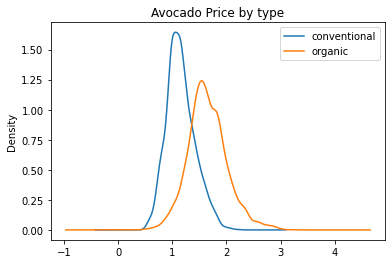

In [49]:
# look at the actual distributions

title='Avocado Price by type'

(
    avocado
    .groupby('type')['AveragePrice']
    .plot(kind='kde', legend=True, subplots=False, title=title)
);

In [50]:
# Organic 
organic = avocado[avocado.type == 'organic']

# Conventional 
conventional = avocado[avocado.type == 'conventional']

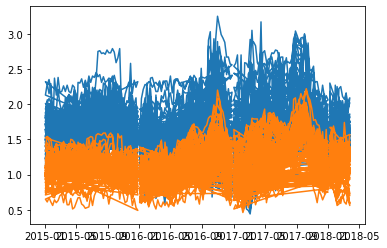

In [51]:
# Plot prices
plt.plot(organic.Date, organic.AveragePrice, label = "line 1")
plt.plot(conventional.Date, conventional.AveragePrice, label = "line 2")

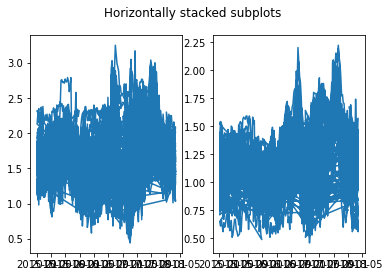

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(organic.Date, organic.AveragePrice)
ax2.plot(conventional.Date, conventional.AveragePrice)

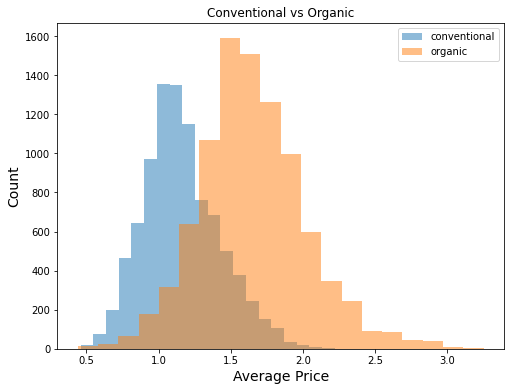

In [53]:
# Both distribution looks gaussian but organic is just shifted to the right
plt.figure(figsize=(8,6))
plt.hist(conventional.AveragePrice, bins=20, alpha=0.5, label="conventional")
plt.hist(organic.AveragePrice, bins=20, alpha=0.5, label="organic")
plt.xlabel("Average Price", size=14)
plt.ylabel("Count", size=14)
plt.title("Conventional vs Organic")
plt.legend(loc='upper right')
# plt.savefig("overlapping_histograms_with_matplotlib_Python.png")

### Testing the hypothesis
- **Null hypothesis:** In the population, birth weights of smokers and non-smokers have the same distribution.
    - I.e., what we saw is due to random chance.
- **Alternative hypothesis:** In the population, babies born to smokers typically have lower birth weight.

In [54]:
type_and_price = avocado[['type', 'AveragePrice']]
type_and_price.head()

,type,AveragePrice
0,conventional,1.33
1,conventional,1.35
2,conventional,0.93
3,conventional,1.08
4,conventional,1.28


#### Choosing a Test Statistic
- What is a reasonable statistic to compute in order to test the null hypothesis?
    - Should differentiate between the distributions.
    - Most simple statistic: **difference in means**

In [55]:
# Get the mains groupby type of avocado
means = type_and_price.groupby('type').mean()

In [56]:
means

,AveragePrice
type,
conventional,1.158040
organic,1.653999


In [57]:
observed_difference = means.diff().iloc[-1,0]

#### Testing through simulation
- **Statistic:** Difference between means.
- **Null hypothesis:** The two groups are sampled from the same distribution.
- Note that the null hypothesis doesn't say what the distribution is.
    - Different from jury panel example, fair coin example, etc.
    - We can't draw directly from the distribution!
- We have to do something a bit more clever.

#### Implications of the null hypothesis
- Under the null hypothesis, both groups are sampled from the same distribution.
- If true, then the group label (Maternal Smoker) has no effect on the birth weight.
- We saw one assignment of group labels:
- But (under the null hypothesis) we were just as likely to see any other assignment.

In [58]:
type_and_price.head()

,type,AveragePrice
0,conventional,1.33
1,conventional,1.35
2,conventional,0.93
3,conventional,1.08
4,conventional,1.28


#### Permutation tests
- Perhaps the difference in means we saw is due to random chance in assignment.
- **Permutation test:** Shuffle the group labels a bunch of times; how often do we see a statistic this extreme?
- Randomly permuting labels is equivalent to randomly assigning birth weights to groups (without changing group sizes)
- If we rarely see something this extreme, then the null hypothesis doesn't look likely.

#### Permutation tests with dataframes
- We want to randomly shuffle the Maternal Smoker column.
- To shuffle rows, we can use .sample(replace=False, frac=1). -- Computationally expensive
- Notice: Both rows are shuffled together (i.e., not independently)!

In [59]:
# (re)run multiple times!
type_and_price.head().sample(replace=False, frac=1)

,type,AveragePrice
1,conventional,1.35
4,conventional,1.28
0,conventional,1.33
3,conventional,1.08
2,conventional,0.93


### Shuffling the groups

In [60]:
type_and_price.head()

,type,AveragePrice
0,conventional,1.33
1,conventional,1.35
2,conventional,0.93
3,conventional,1.08
4,conventional,1.28


In [61]:
# It doesn't matter which column we shuffle! Here, we'll shuffle AveragePrice
shuffled_weights = (
    type_and_price['AveragePrice']
    .sample(replace=False, frac=1)
    .reset_index(drop=True)
)

original_and_shuffled = (
    type_and_price
    .assign(**{'Shuffled Average Price': shuffled_weights})
)
original_and_shuffled.head(10)

,type,AveragePrice,Shuffled Average Price
0,conventional,1.33,1.53
1,conventional,1.35,1.14
2,conventional,0.93,1.37
3,conventional,1.08,1.14
4,conventional,1.28,1.38
5,conventional,1.26,1.26
6,conventional,0.99,1.43
7,conventional,0.98,1.49
8,conventional,1.02,1.12
9,conventional,1.07,1.14


#### How close are the means of the shuffled groups?

In [62]:
# Shuffling the weights makes it easier to do this...
original_and_shuffled.groupby('type').mean()

,AveragePrice,Shuffled Average Price
type,,
conventional,1.158040,1.403542
organic,1.653999,1.408416


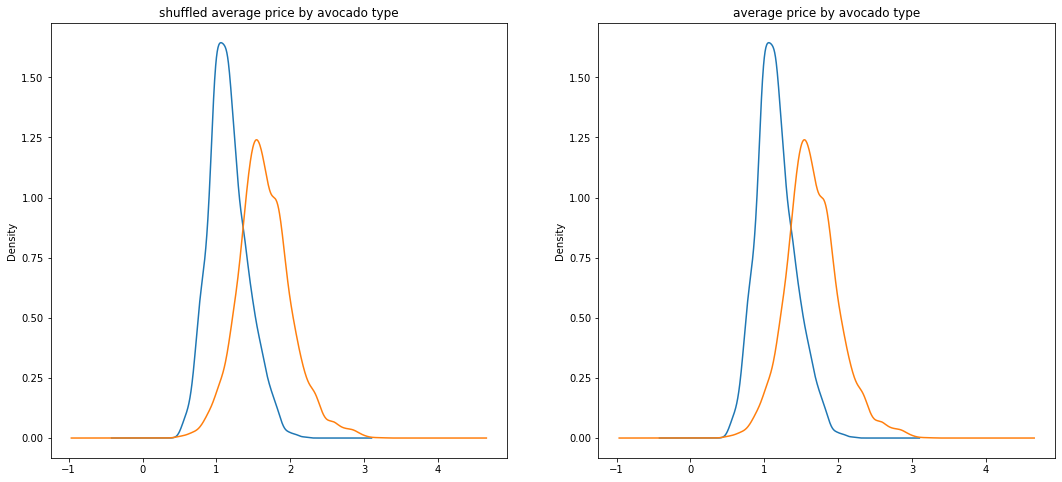

In [63]:
# The distribution of the shuffled groups

fig, axes = plt.subplots(1,2, figsize=(18,8))

title = 'shuffled average price by avocado type'
original_and_shuffled.groupby('type')['AveragePrice'].plot(kind='kde', title=title, ax=axes[0])

title = 'average price by avocado type'
original_and_shuffled.groupby('type')['AveragePrice'].plot(kind='kde', title=title, ax=axes[1]);

### Simulation
- This was just one random shuffle.
- How likely is it that a random shuffle results in a 9+ ounce difference in means?
- We have to repeat the shuffling a bunch of times. On each iteration:
    1. Shuffle the weights.
    2. Put them in a table.
    3. Compute difference in group means.

In [71]:
n_repetitions = 500

differences = []
for _ in range(n_repetitions):
    
    # shuffle the weights
    shuffled_weights = (
        type_and_price['AveragePrice']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        type_and_price
        .assign(**{'Shuffled Average Price': shuffled_weights})
    )
    
    # compute the group differences (test statistic!)
    group_means = (
        shuffled
        .groupby('type')
        .mean()
        .loc[:, 'Shuffled Average Price']
    )
    difference = group_means.diff().iloc[-1]
    
    # add it to the list of results
    differences.append(difference)

In [65]:
observed_difference = (
    type_and_price
    .groupby('type')['AveragePrice']
    .mean()
    .diff()
    .iloc[-1]
)

#### Conclusion of the test

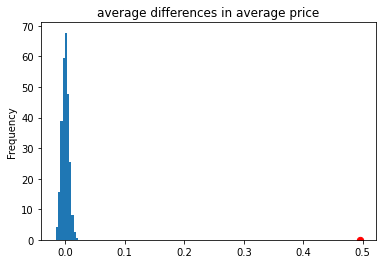

In [66]:
title = 'average differences in average price'
pd.Series(differences).plot(kind='hist', density=True, title=title)
plt.scatter(observed_difference, 0, color='red', s=40);

### Seasonal Patterns
- By year 
- By month 
- By season
- Trends amongst different seasons 
- Differences between conventional vs organic 
- Standout times for avocados 


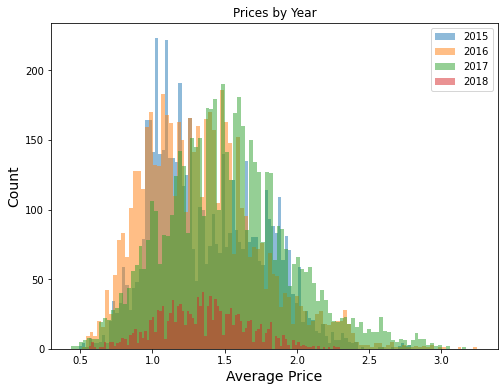

In [67]:
plt.figure(figsize=(8,6))
plt.hist(original_avocado[original_avocado.Date.dt.year == 2015].AveragePrice, bins=100, alpha=0.5, label="2015")
plt.hist(original_avocado[original_avocado.Date.dt.year == 2016].AveragePrice, bins=100, alpha=0.5, label="2016")
plt.hist(original_avocado[original_avocado.Date.dt.year == 2017].AveragePrice, bins=100, alpha=0.5, label="2017")
plt.hist(original_avocado[original_avocado.Date.dt.year == 2018].AveragePrice, bins=100, alpha=0.5, label="2018")

plt.xlabel("Average Price", size=14)
plt.ylabel("Count", size=14)
plt.title("Prices by Year")
plt.legend(loc='upper right')

In [68]:
original_avocado.groupby(original_avocado.Date.dt.year).mean()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Date,,,,,,,,,,
2015,1.375590,7.810274e+05,304443.451708,313633.844367,25426.962520,137523.105437,113033.429256,23520.285037,969.390611,2015.0
2016,1.338640,8.584206e+05,271567.466578,297850.478632,28468.633371,260533.986204,197025.327568,59940.587974,3568.070662,2016.0
2017,1.515128,8.623393e+05,288716.905194,269964.124350,15941.542779,287712.119423,213728.158838,69790.115367,4193.843471,2017.0
2018,1.347531,1.066928e+06,355323.868904,314628.606698,17694.903387,379271.564429,278349.820795,95358.015340,5563.728295,2018.0


In [69]:
original_avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


<AxesSubplot:>

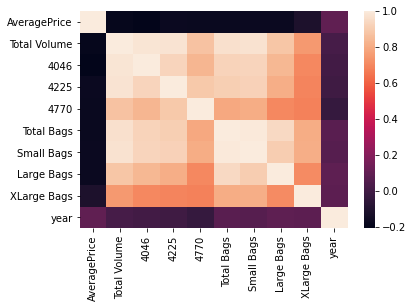

In [70]:
corr = avocado.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)